In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# import csv
rough = "Resources/suicide_rates.csv"
rough_data_df = pd.read_csv(rough)

In [26]:
# drop unnecessary columns
rough_df = rough_data_df.drop(columns=["HDI for year", "country-year", "generation", "gdp_per_capita ($)", "population"])

# drop rows with missing values
rough_df.dropna(how='any')

# clean up age range fill
rough_df['age'] = rough_df['age'].replace({'35-54 years': '35-54', '25-34 years': '25-34', '55-74 years': '55-74', '75+ years': '75+', '15-24 years': '15-24', '5-14 years': '05-14'})

# rename columns
renamed_df = rough_df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age Range", "suicides/100k pop":"Suicides/100k pop", "suicides_no": "Suicide Count", " gdp_for_year ($) ":"GDP(Year)"})

# filter for years 2000-2016
after_start_date = renamed_df["Year"] >= 2000
before_end_date = renamed_df["Year"] <= 2016
between_two_dates = after_start_date & before_end_date
filtered_date = renamed_df.loc[between_two_dates]

filtered_date_df = pd.DataFrame(filtered_date)

# Convert data type for GDP calculations 
filtered_date_df["GDP(Year)"] = filtered_date_df["GDP(Year)"].str.replace(',','').astype(int)

# Filter down countries 
target_countries= filtered_date_df.loc[(filtered_date_df['Country']== "United States")|  (filtered_date_df["Country"]== "Canada") | (filtered_date_df["Country"]== "Mexico") | (filtered_date_df["Country"]== "Antigua and Barbuda")|(filtered_date_df["Country"]== "Argentina")|(filtered_date_df["Country"]== "Bahamas")| (filtered_date_df["Country"]== "Barbados")|(filtered_date_df["Country"]== "Belize")|(filtered_date_df["Country"]== "Brazil")| (filtered_date_df["Country"]== "Chile")|(filtered_date_df["Country"]== "Colombia")|(filtered_date_df["Country"]== "Costa Rica")|(filtered_date_df["Country"]== "Cuba")| (filtered_date_df["Country"]== "Ecuador")|  (filtered_date_df["Country"]== "El Salvador")| (filtered_date_df["Country"]== "Grenada")| (filtered_date_df["Country"]== "Guatemala")| (filtered_date_df["Country"]== "Jamaica")|(filtered_date_df["Country"]== "Nicaragua")| (filtered_date_df["Country"]== "Panama")| (filtered_date_df["Country"]== "Paraguay")| (filtered_date_df["Country"]== "Puerto Rico")| (filtered_date_df["Country"]== "Saint Lucia")| (filtered_date_df["Country"]== "Saint Vincent and Grenadines")| (filtered_date_df["Country"]== "Suriname")| (filtered_date_df["Country"]== "Trinidad and Tobago")| (filtered_date_df["Country"] == "Uruguay"), :]

target_countries_df= pd.DataFrame(target_countries)

# Display table
target_countries_df.head()

,Country,Year,Sex,Age Range,Suicide Count,Suicides/100k pop,GDP(Year)
420,Antigua and Barbuda,2000,male,55-74,1,30.00,830158778
421,Antigua and Barbuda,2000,male,35-54,1,9.97,830158778
422,Antigua and Barbuda,2000,female,15-24,0,0.00,830158778
423,Antigua and Barbuda,2000,female,25-34,0,0.00,830158778
424,Antigua and Barbuda,2000,female,35-54,0,0.00,830158778


In [27]:
# group by year and country / find averages

country_gdp = filtered_date_df.groupby(["Country", "Year"])["GDP(Year)"].mean()
country_suicide = filtered_date_df.groupby(["Country", "Year"])['Suicides/100k pop'].mean()

# create summary table
country_summary_df = pd.DataFrame({"GDP Mean": country_gdp, "Suicide Rate Mean": country_suicide})

country_summary_reset_df = country_summary_df.reset_index()

# display table
country_summary_reset_df


,Country,Year,GDP Mean,Suicide Rate Mean
0,Albania,2000,3632043908,2.558333
1,Albania,2001,4060758804,4.218333
2,Albania,2002,4435078648,5.209167
3,Albania,2003,5746945913,4.883333
4,Albania,2004,7314865176,5.449167
...,...,...,...,...
1345,Uzbekistan,2010,39332770929,5.269167
1346,Uzbekistan,2011,45915191189,5.595000
1347,Uzbekistan,2012,51821573338,6.460833
1348,Uzbekistan,2013,57690453461,6.571667


<IPython.core.display.Javascript object>


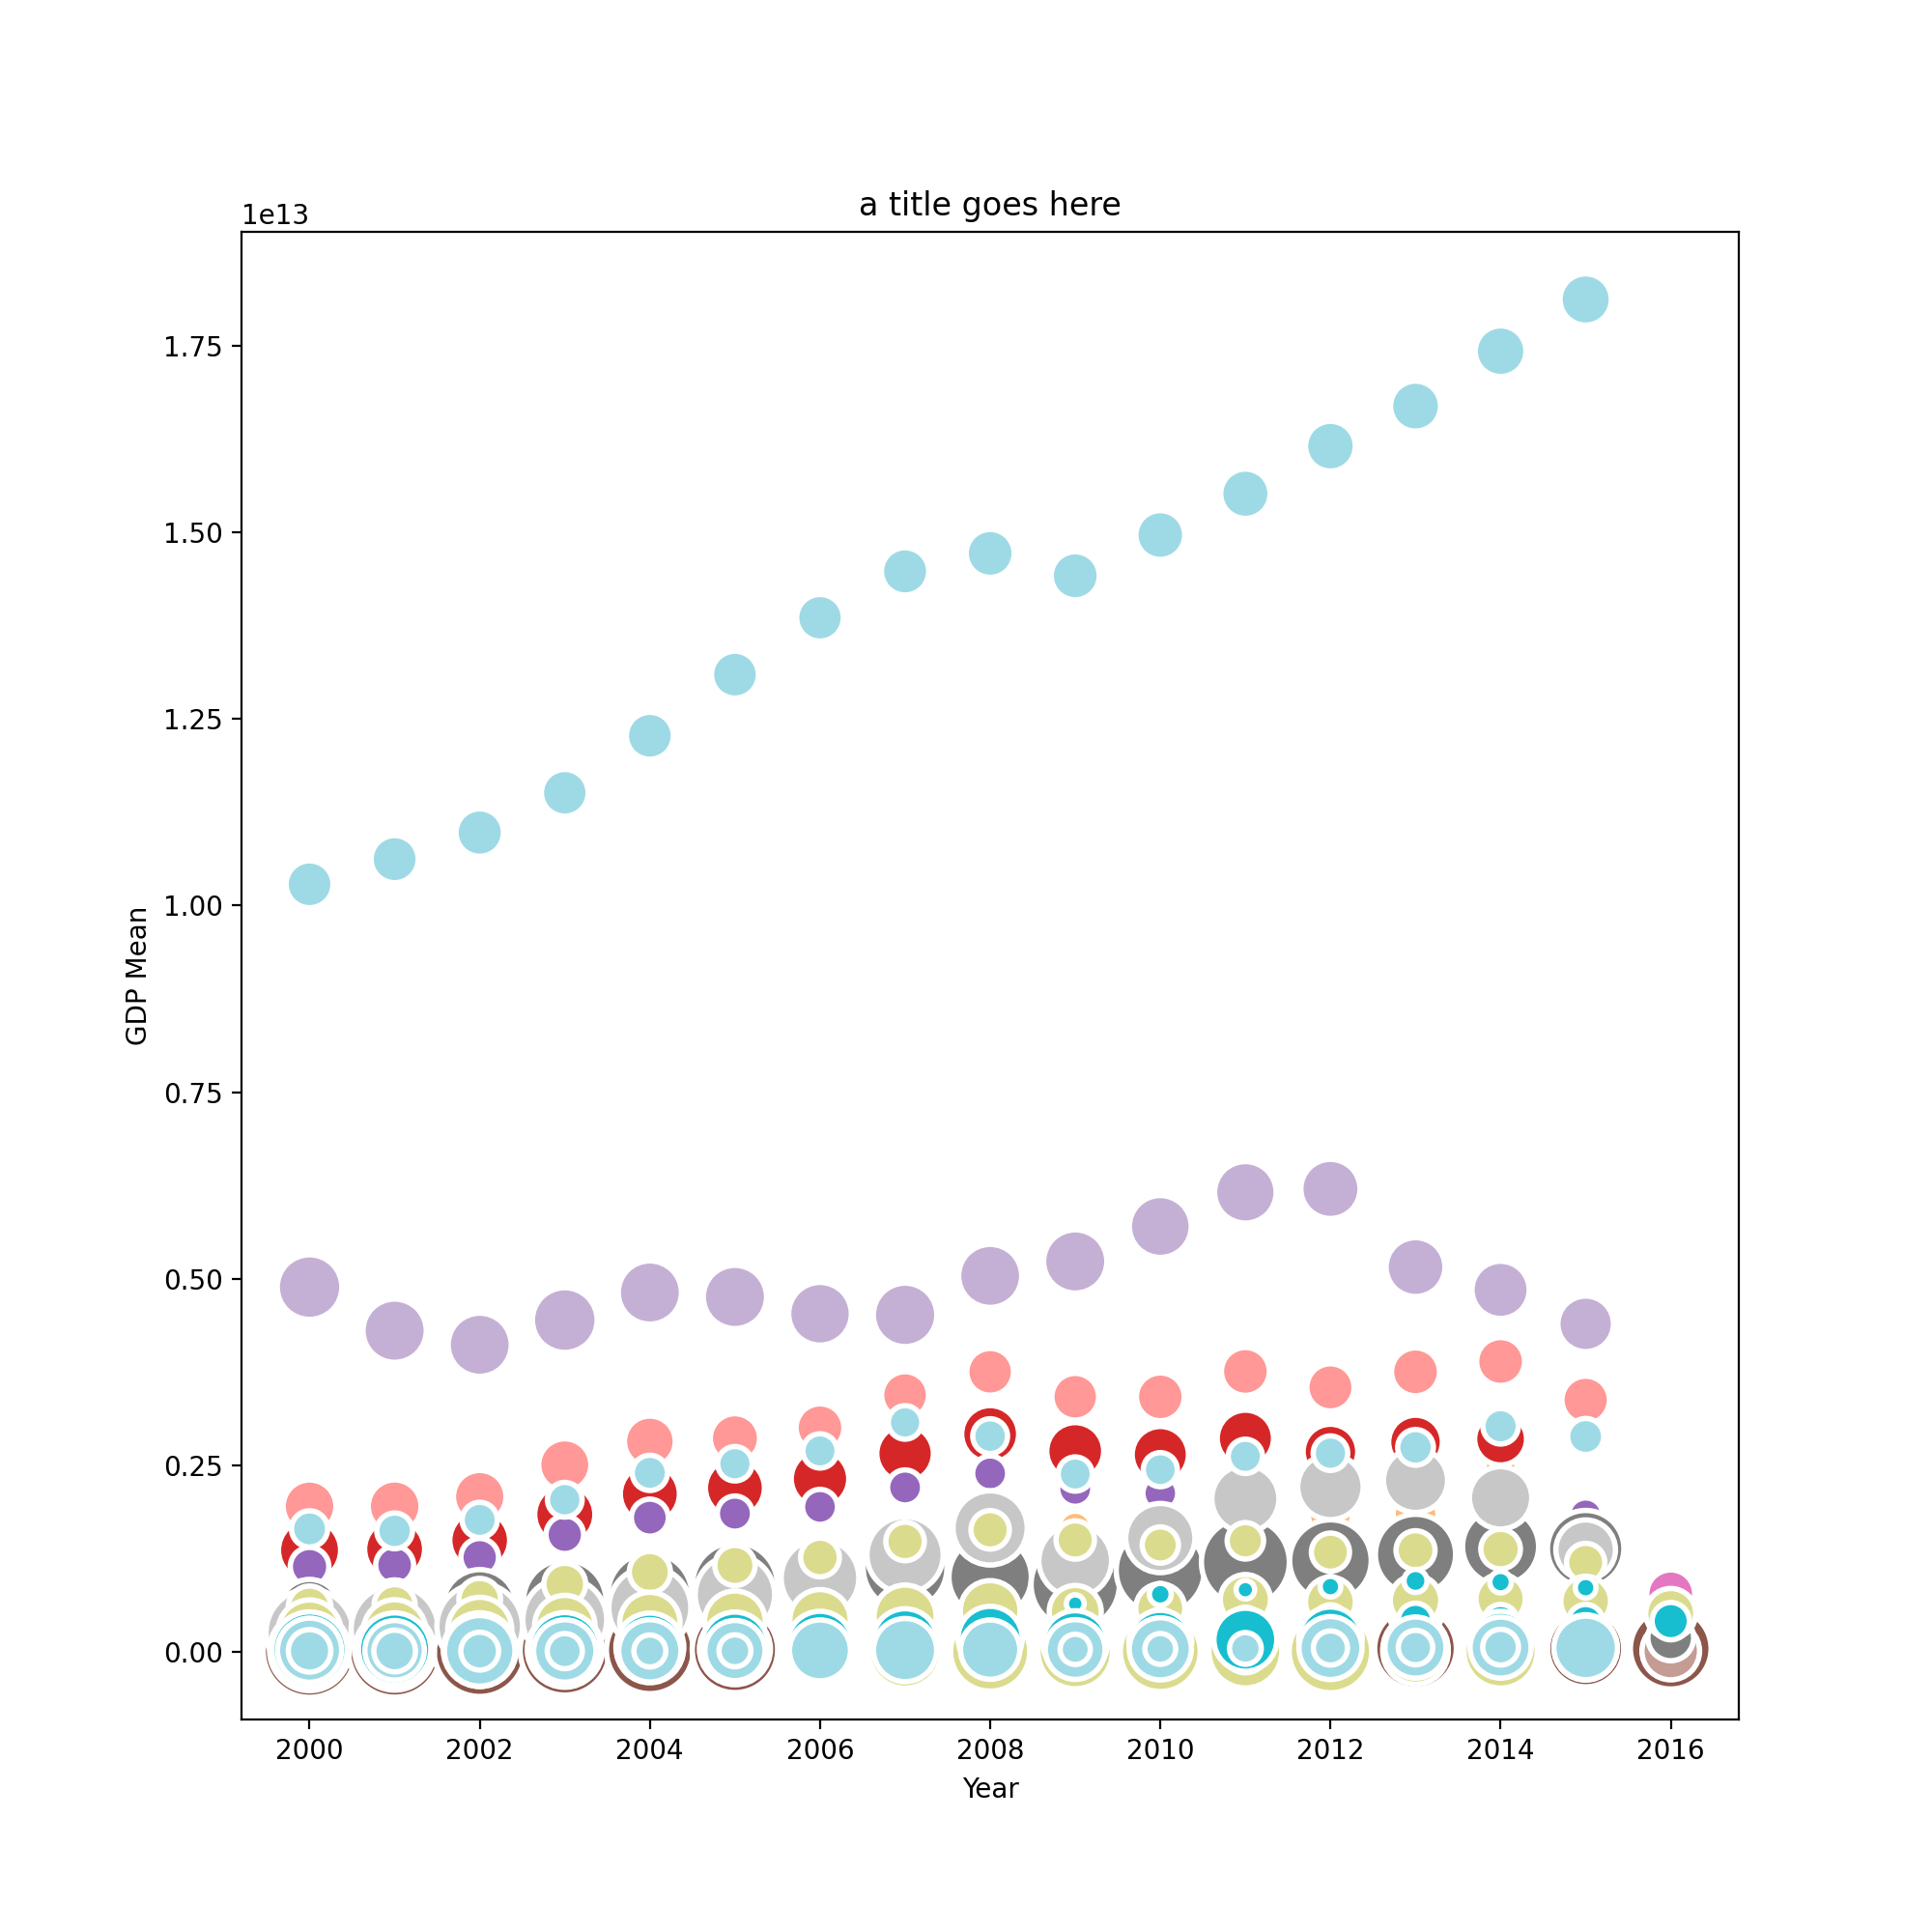

In [28]:
country_summary_reset_df["Country"] = pd.Categorical(country_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
sc = plt.scatter(
    x = country_summary_reset_df["Year"], 
    y = country_summary_reset_df["GDP Mean"], 
    s = (country_summary_reset_df["Suicide Rate Mean"]*25), 
    c = country_summary_reset_df["Country"].cat.codes,
    cmap="tab20",  
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)

plt.xlabel("Year")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);




# Display plot
plt.show()

In [29]:
# Group by Country, Year, Ages / find averages
age_gdp = filtered_date_df.groupby(["Country", "Age Range"])["GDP(Year)"].mean()
age_suicide = filtered_date_df.groupby(["Country", "Age Range"])['Suicides/100k pop'].mean()

# Create summary table
age_summary_df = pd.DataFrame({"GDP Mean": age_gdp, "Suicide Rate Mean": age_suicide})

age_summary_reset_df = age_summary_df.reset_index()

# Display table
age_summary_reset_df


,Country,Age Range,GDP Mean,Suicide Rate Mean
0,Albania,05-14,8.172219e+09,0.524091
1,Albania,15-24,8.172219e+09,3.287273
2,Albania,25-34,8.172219e+09,4.156364
3,Albania,35-54,8.172219e+09,3.963182
4,Albania,55-74,8.172219e+09,3.438182
...,...,...,...,...
582,Uzbekistan,15-24,3.023597e+10,8.576250
583,Uzbekistan,25-34,3.023597e+10,9.044583
584,Uzbekistan,35-54,3.023597e+10,9.106667
585,Uzbekistan,55-74,3.023597e+10,7.130000


<IPython.core.display.Javascript object>


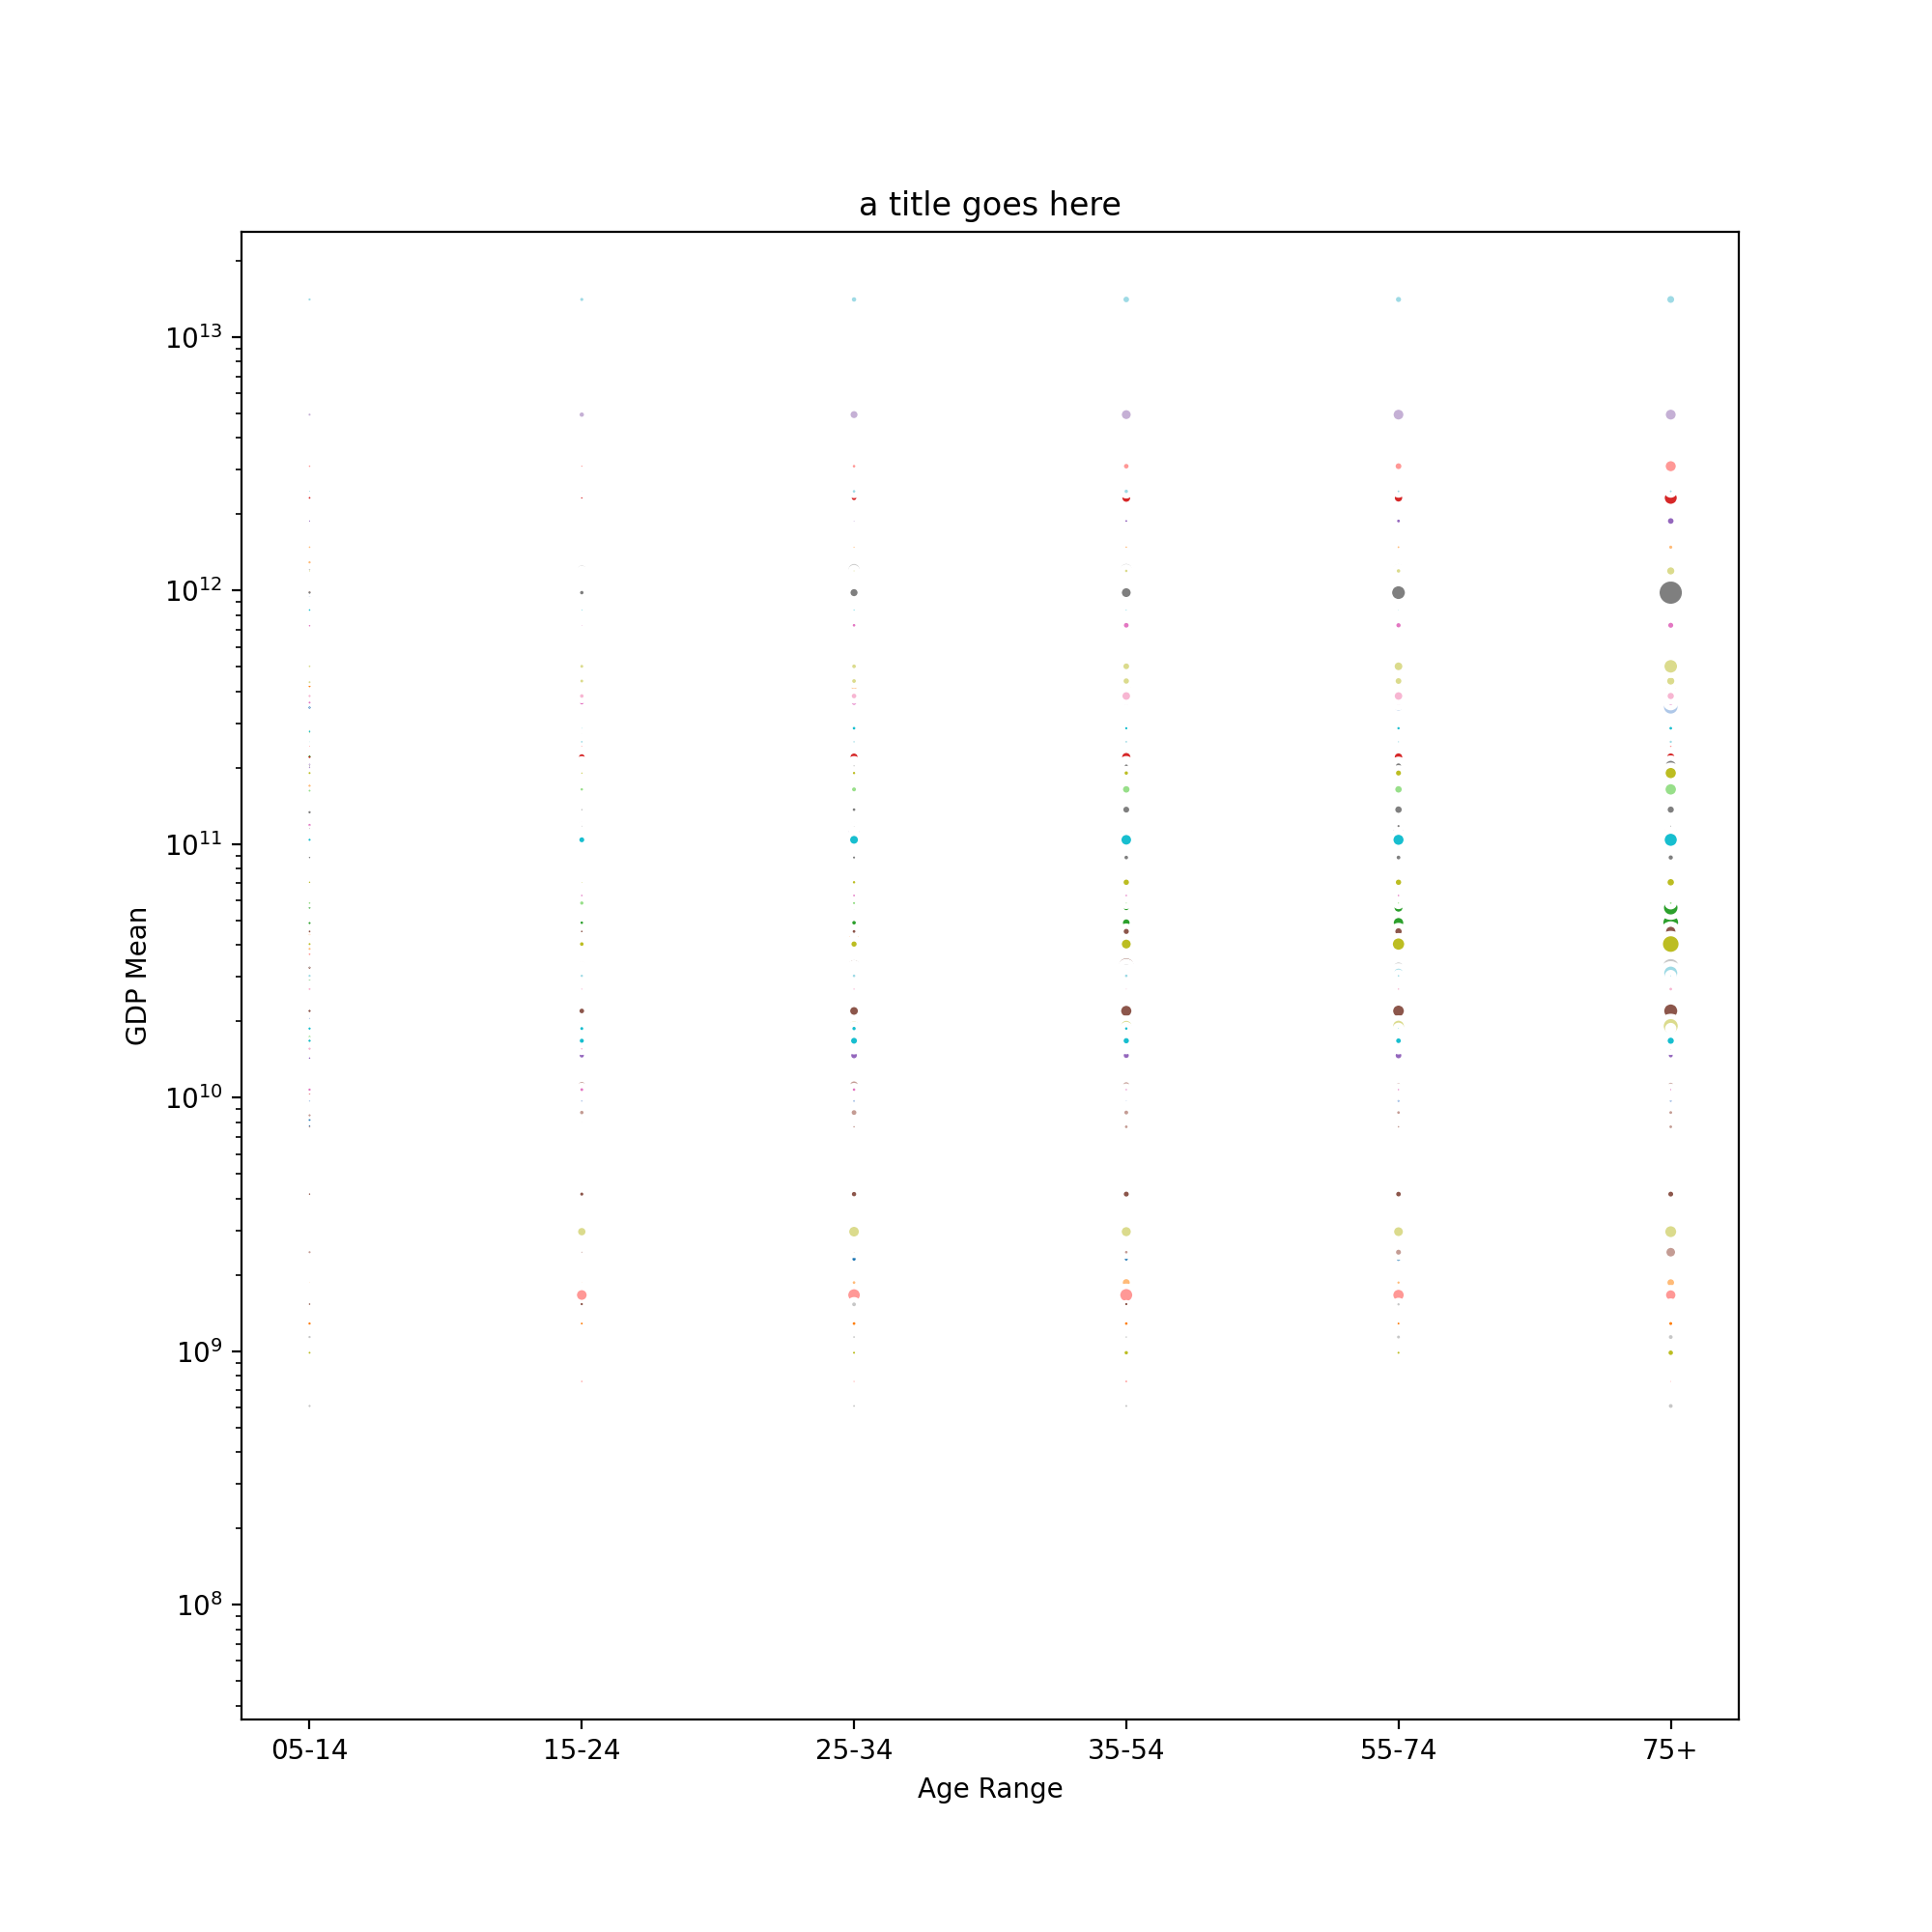

In [9]:
age_summary_reset_df["Country"] = pd.Categorical(age_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = age_summary_reset_df["Age Range"], 
    y = age_summary_reset_df["GDP Mean"], 
    s= age_summary_reset_df["Suicide Rate Mean"], 
    c= age_summary_reset_df["Country"].cat.codes, 
    cmap="tab20",  
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Age Range")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

<IPython.core.display.Javascript object>


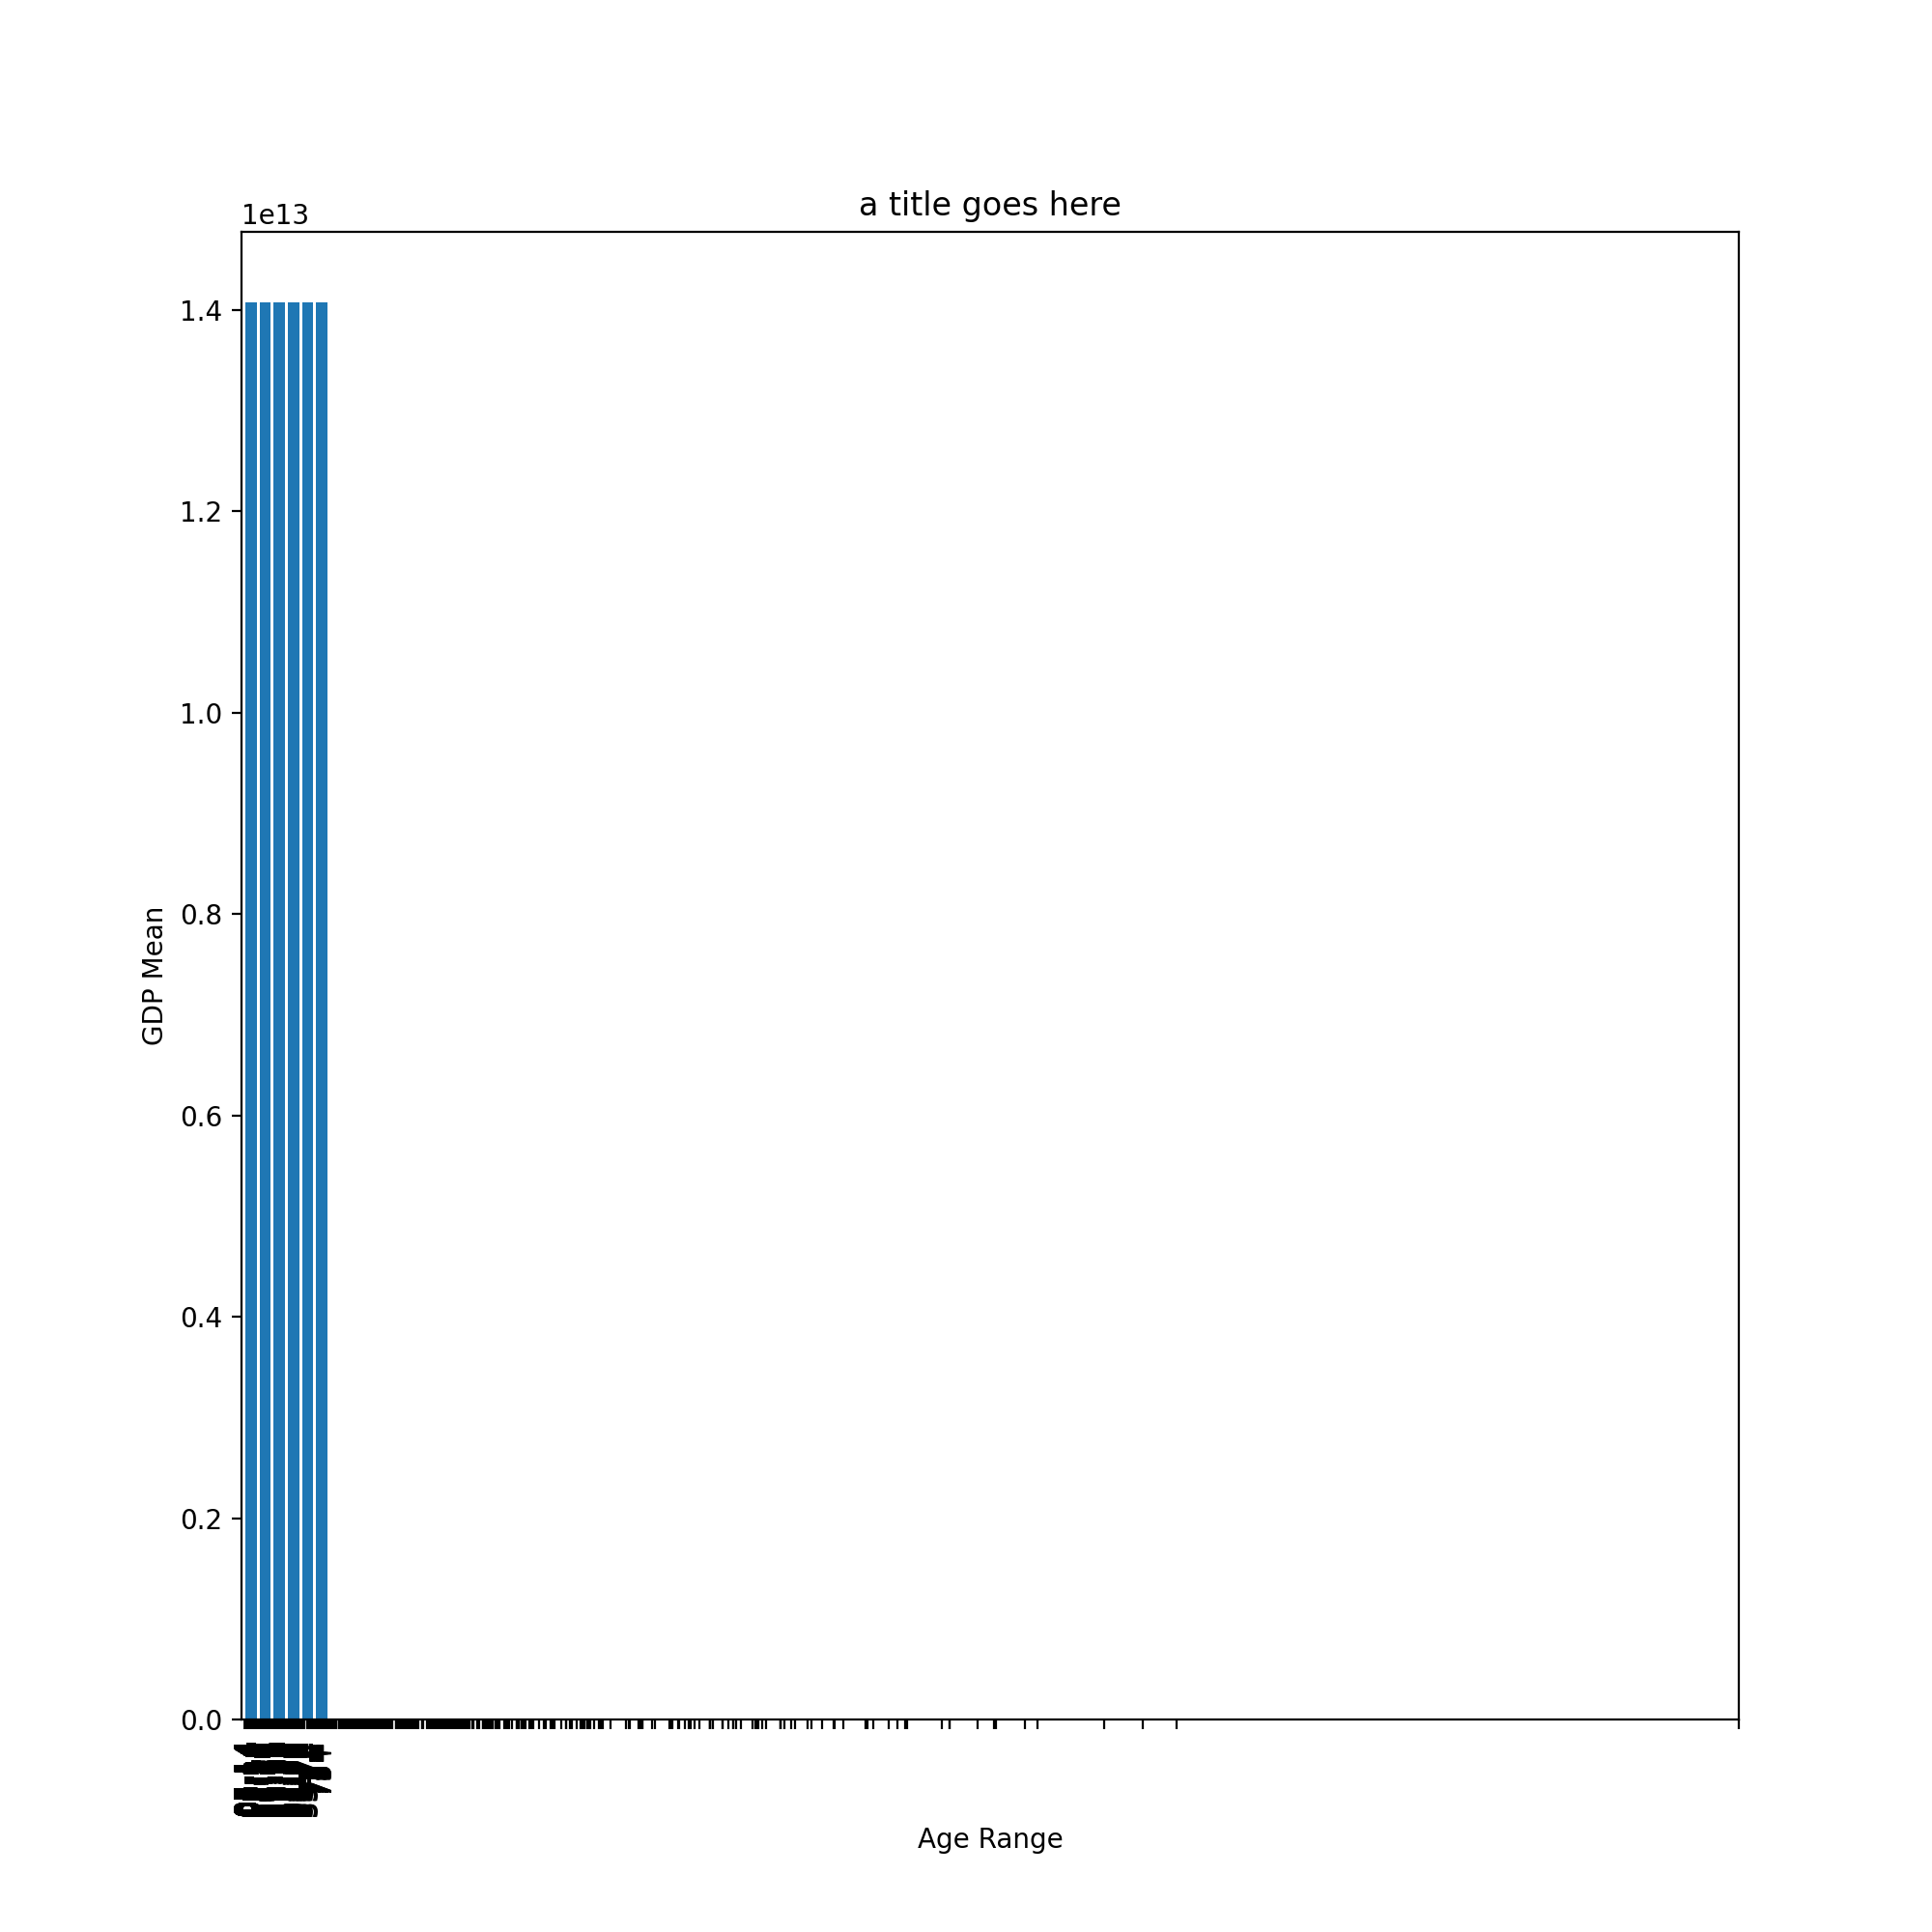

In [30]:
age_summary_reset_df["Country"] = pd.Categorical(age_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot

x = age_summary_reset_df["Age Range"] 
y = age_summary_reset_df["GDP Mean"] 
s= age_summary_reset_df["Suicide Rate Mean"] 
#c= age_summary_reset_df["Country"]



# Add titles (main and on axis)

plt.xlabel("Age Range")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);



plt.bar(x, y, align="edge") 
plt.xticks( s, rotation="vertical")







# Display plot
plt.show()

In [31]:
# Group by Country, Year, Sex / find averages
sex_gdp = filtered_date_df.groupby(["Country", "Sex"])["GDP(Year)"].mean()
sex_suicide = filtered_date_df.groupby(["Country", "Sex"])['Suicides/100k pop'].mean()

# Creat summary table
sex_summary_df = pd.DataFrame({"GDP Mean": sex_gdp, "Suicide Rate Mean": sex_suicide})

sex_summary_reset_df = sex_summary_df.reset_index()

# Display table
sex_summary_reset_df

,Country,Sex,GDP Mean,Suicide Rate Mean
0,Albania,female,8.172219e+09,2.475909
1,Albania,male,8.172219e+09,4.287424
2,Antigua and Barbuda,female,1.096668e+09,0.185952
3,Antigua and Barbuda,male,1.096668e+09,1.562857
4,Argentina,female,3.455685e+11,3.373229
...,...,...,...,...
191,United States,male,1.406948e+13,21.297812
192,Uruguay,female,3.100206e+10,7.321778
193,Uruguay,male,3.100206e+10,35.760000
194,Uzbekistan,female,3.023597e+10,3.689167


<IPython.core.display.Javascript object>


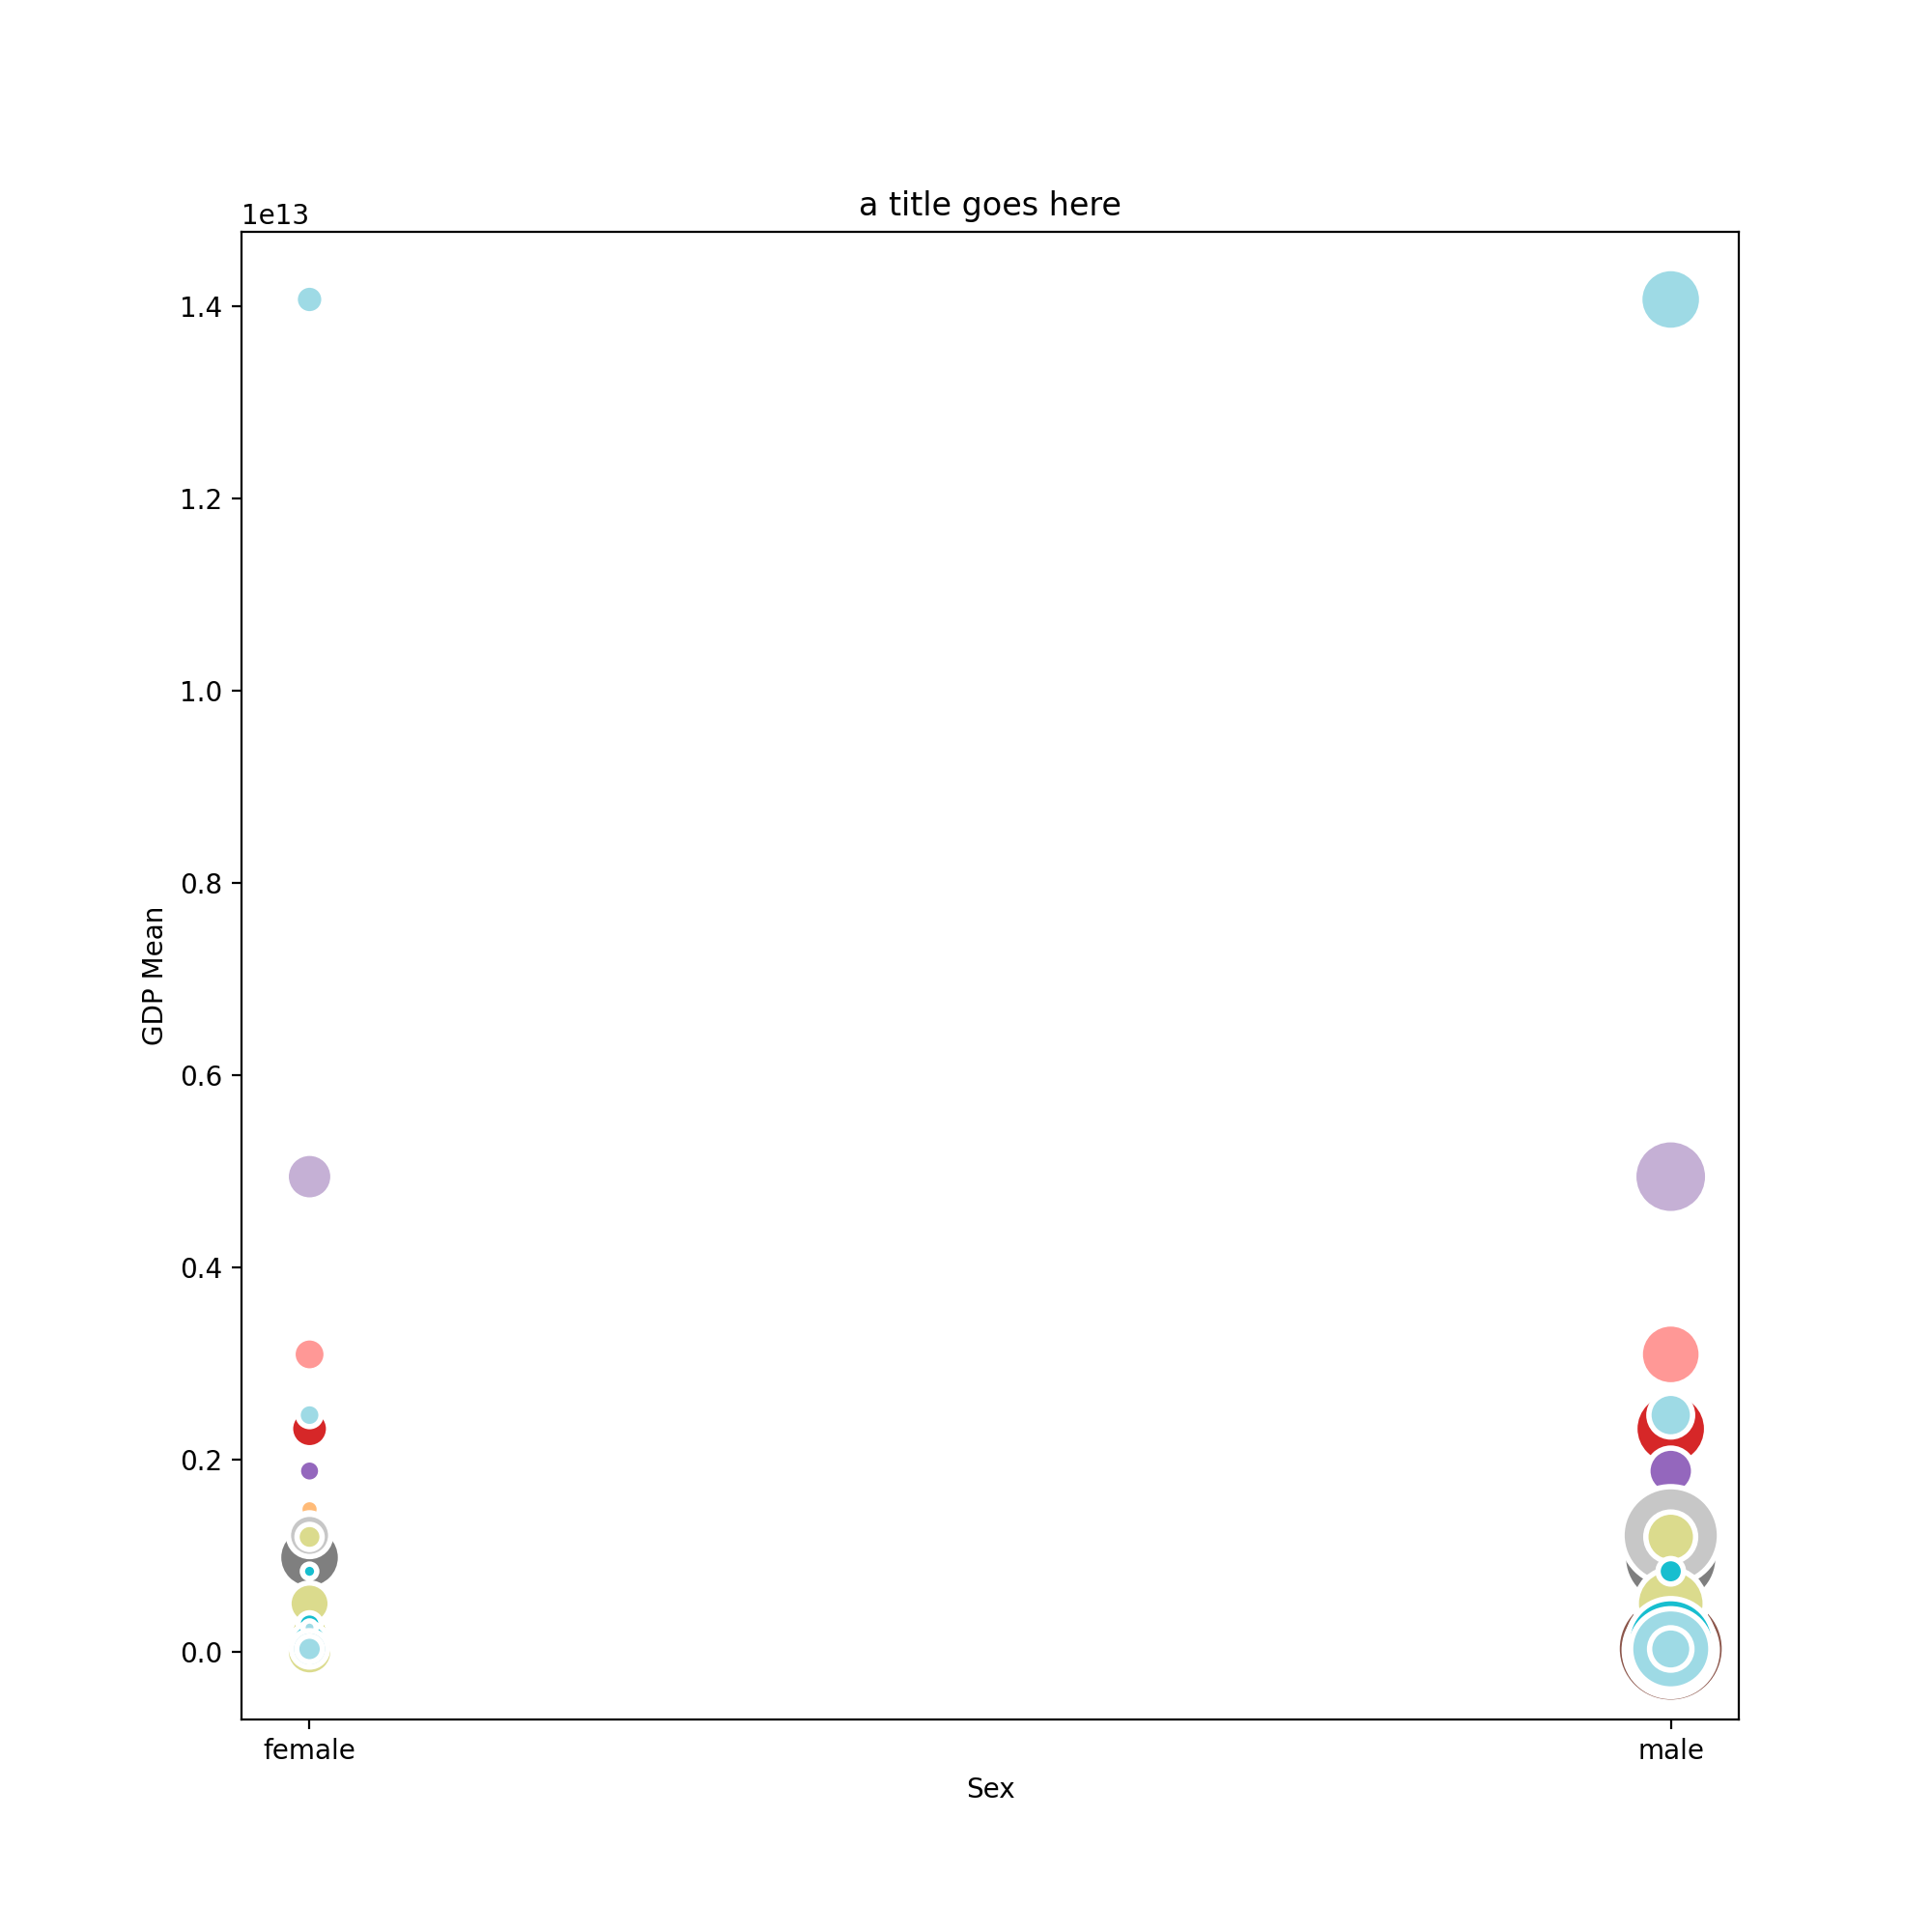

In [12]:
sex_summary_reset_df["Country"] = pd.Categorical(sex_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = sex_summary_reset_df["Sex"], 
    y = sex_summary_reset_df["GDP Mean"], 
    s = (sex_summary_reset_df["Suicide Rate Mean"]*25), 
    c = sex_summary_reset_df["Country"].cat.codes, 
    cmap="tab20", 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)

plt.xlabel("Sex")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

In [32]:
#Are suicide rates higher in developing countries or developed countries?

#heatmap of suicide rates globally 


In [33]:
#Country v.  Overall suicide rate
#mean_sui = filtered_date_df['Suicides/100k pop'].mean()
#filtered_date_df['Above Average?'] = (filtered_date_df['Suicides/100k pop'] >= mean_sui)

df_Country_Overall_suicide_rate = filtered_date_df.groupby('Country')['Suicides/100k pop'].mean()
#filtered_date_df.head()

#define 'Overall suicide rate'
#mean_sui1 = filtered_date_df['Suicides/100k pop'].mean()
mean_sui2 = df_Country_Overall_suicide_rate.mean()
#print(mean_sui1)raw average
#print(mean_sui2)average of averages
#df_Country_Overall_suicide_rate['Suicides/100k pop'] 
#df_df_Country_Overall_suicide_rate() 
Deviation = df_Country_Overall_suicide_rate - mean_sui2
country_mean_df = pd.DataFrame({"Country Mean":df_Country_Overall_suicide_rate, "Global Mean":mean_sui2, "Deviation":Deviation})
country_mean_df

,Country Mean,Global Mean,Deviation
Country,,,
Albania,3.381667,11.481212,-8.099545
Antigua and Barbuda,0.874405,11.481212,-10.606807
Argentina,10.186094,11.481212,-1.295118
Armenia,3.131517,11.481212,-8.349695
Aruba,8.142639,11.481212,-3.338573
...,...,...,...
United Arab Emirates,1.317917,11.481212,-10.163295
United Kingdom,6.769635,11.481212,-4.711577
United States,12.945417,11.481212,1.464205


In [34]:
#Gender v. Country & Suicide rate
Gender_tmp_df = filtered_date_df.groupby(['Country','Sex'])['Suicides/100k pop'].mean()


Gender_tmp_df.head()

Country              Sex   
Albania              female    2.475909
                     male      4.287424
Antigua and Barbuda  female    0.185952
                     male      1.562857
Argentina            female    3.373229
Name: Suicides/100k pop, dtype: float64

In [35]:
#Age Range v. Country & Suicide rate
Age_tmp_df = filtered_date_df.groupby(['Country','Age Range'])['Suicides/100k pop'].mean()

Age_tmp_df




Country     Age Range
Albania     05-14        0.524091
            15-24        3.287273
            25-34        4.156364
            35-54        3.963182
            55-74        3.438182
                           ...   
Uzbekistan  15-24        8.576250
            25-34        9.044583
            35-54        9.106667
            55-74        7.130000
            75+          5.862500
Name: Suicides/100k pop, Length: 587, dtype: float64

In [36]:
#suicide rates in the United States for 2017-2019?

#suicide rates in the United States for 2013-2016?

after_start_date = renamed_df["Year"] >= 2013
before_end_date = renamed_df["Year"] <= 2016
between_two_dates = after_start_date & before_end_date
filtered_date_df = renamed_df.loc[between_two_dates]

# display sample

filtered_date_df.head()

,Country,Year,Sex,Age Range,Suicide Count,Suicides/100k pop,GDP(Year)
552,Antigua and Barbuda,2013,female,15-24,0,0.0,"1,192,925,407"
553,Antigua and Barbuda,2013,female,25-34,0,0.0,"1,192,925,407"
554,Antigua and Barbuda,2013,female,35-54,0,0.0,"1,192,925,407"
555,Antigua and Barbuda,2013,female,05-14,0,0.0,"1,192,925,407"
556,Antigua and Barbuda,2013,female,55-74,0,0.0,"1,192,925,407"


In [37]:
filtered_date_df["Country"].value_counts()

Austria                   46
Hungary                   46
Armenia                   46
Thailand                  46
Iceland                   46
                          ..
New Zealand               12
Barbados                  12
Oman                      12
Bosnia and Herzegovina    12
Mongolia                  10
Name: Country, Length: 84, dtype: int64

In [38]:
#checking for true values
(filtered_date_df["Country"]=="United States").value_counts()

False    2764
True       36
Name: Country, dtype: int64

In [39]:
#Build a filter for a true/false map(boolean), then apply back to the orginal data frame
us_df=filtered_date_df.loc[filtered_date_df["Country"]=="United States"]


In [41]:
#suicide rates in the United States for 2013-2016?
groupby_df=us_df.groupby("Year")["Suicide Count"].sum()

groupby_df

Year
2013    41143
2014    42769
2015    44189
Name: Suicide Count, dtype: int64

In [42]:
(filtered_date_df.Year==2013).value_counts()

False    1840
True      960
Name: Year, dtype: int64

In [44]:
us_df

,Country,Year,Sex,Age Range,Suicide Count,Suicides/100k pop,GDP(Year)
27184,United States,2013,male,75+,2990,38.25,"16,691,517,000,000"
27185,United States,2013,male,55-74,8445,27.77,"16,691,517,000,000"
27186,United States,2013,male,35-54,11396,27.08,"16,691,517,000,000"
27187,United States,2013,male,25-34,5063,23.67,"16,691,517,000,000"
27188,United States,2013,male,15-24,3903,17.17,"16,691,517,000,000"
27189,United States,2013,female,35-54,3776,8.99,"16,691,517,000,000"
27190,United States,2013,female,55-74,2484,7.48,"16,691,517,000,000"
27191,United States,2013,female,25-34,1285,6.13,"16,691,517,000,000"
27192,United States,2013,female,15-24,975,4.49,"16,691,517,000,000"
27193,United States,2013,female,75+,431,3.75,"16,691,517,000,000"


In [45]:

filtered_date_df.dtypes

Country               object
Year                   int64
Sex                   object
Age Range             object
Suicide Count          int64
Suicides/100k pop    float64
GDP(Year)             object
dtype: object

In [18]:
#Aggrate data by gender/gdp & suicide rate for 2017-2019

In [19]:
#Aggrate Data by gender/gdp & suicide rate for 2017-2019